In [1]:
import sqlite3
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Part 1: Wrangling
salary_query = "SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries GROUP BY yearID, teamID"
win_percent_query = "SELECT yearID,teamID, W, G, (W * 1.0) * 100 / (G * 1.0) as win_percent FROM Teams  WHERE yearID > 1984 GROUP BY yearID, teamID"


sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

team_salaries_14 = pandas.read_sql(salary_query, conn)
team_win_percent_14 = pandas.read_sql(win_percent_query, conn)

# Inner join the two graphs to see the relation 
team_relations_14 = team_salaries_14.merge(team_win_percent_14, how = "inner", left_on = ["yearID","teamID"], right_on = ["yearID", "teamID"])
print(team_relations_14.head(len(team_relations_14)))
print("\n")
conn.close()


     yearID teamID  total_payroll   W    G  win_percent
0      1985    ATL     14807000.0  66  162    40.740741
1      1985    BAL     11560712.0  83  161    51.552795
2      1985    BOS     10897560.0  81  163    49.693252
3      1985    CAL     14427894.0  90  162    55.555556
4      1985    CHA      9846178.0  85  163    52.147239
..      ...    ...            ...  ..  ...          ...
853    2014    SLN    120693000.0  90  162    55.555556
854    2014    TBA     72689100.0  77  162    47.530864
855    2014    TEX    112255059.0  67  162    41.358025
856    2014    TOR    109920100.0  83  162    51.234568
857    2014    WAS    131983680.0  96  162    59.259259

[858 rows x 6 columns]




To create the relation between the total payroll and winning percentage for each team, I first made two separate tables; the salary_query table, where I obtained the total payroll for every team, and the win_percent table, where I included the W and G table to calculate the win percentage for each team. With these two individual tables giving data on both sides of the relation, I used an inner join to create the relation. This way, it only included the data that had both parts of the relation filled in. As a result, the relation had no missing data. 

     yearID teamID  total_payroll
0      1990    ATL     14555501.0
1      1990    BAL      9680084.0
2      1990    BOS     20558333.0
3      1990    CAL     21720000.0
4      1990    CHA      9491500.0
..      ...    ...            ...
725    2014    SLN    120693000.0
726    2014    TBA     72689100.0
727    2014    TEX    112255059.0
728    2014    TOR    109920100.0
729    2014    WAS    131983680.0

[730 rows x 3 columns]


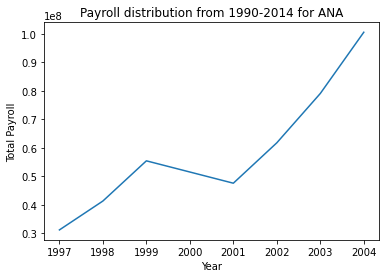

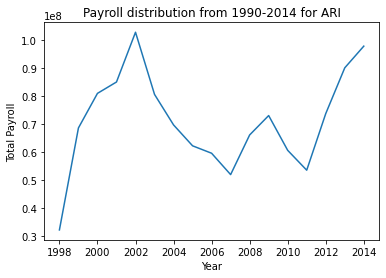

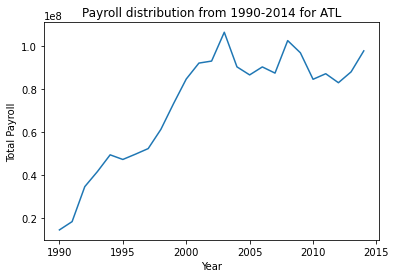

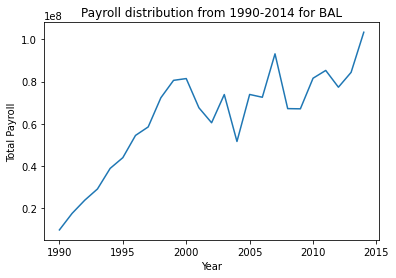

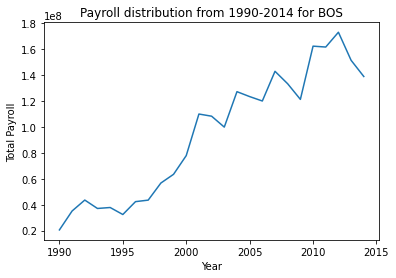

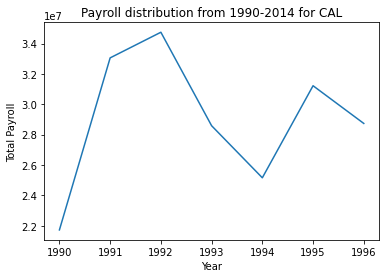

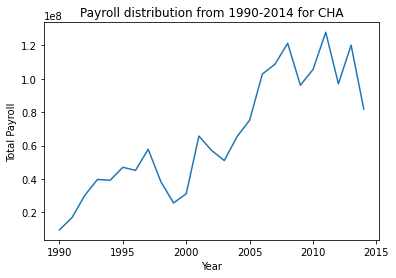

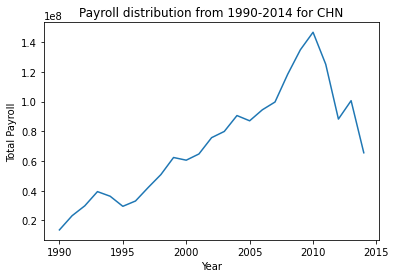

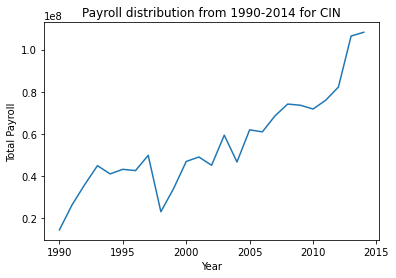

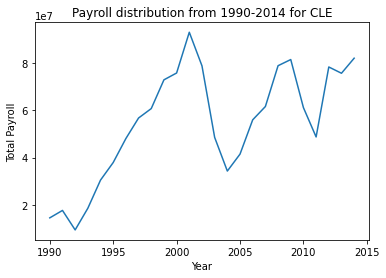

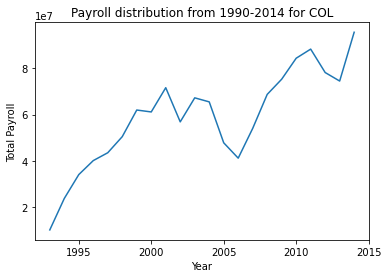

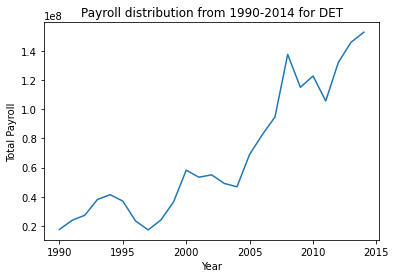

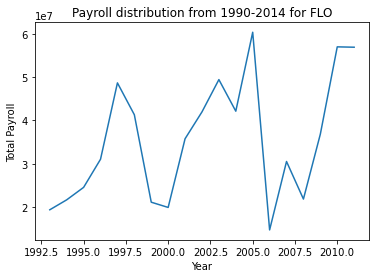

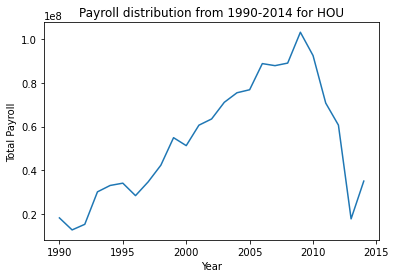

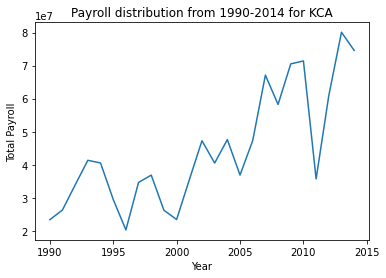

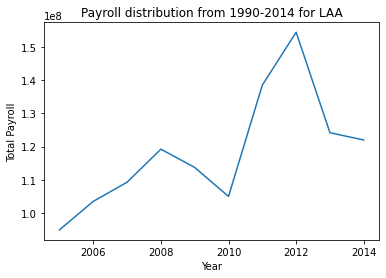

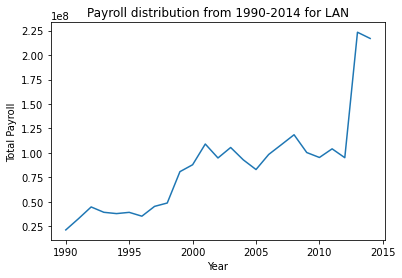

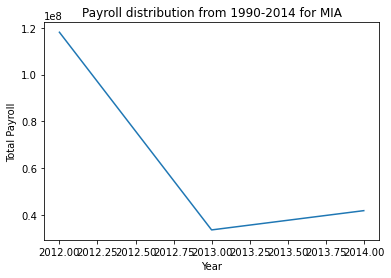

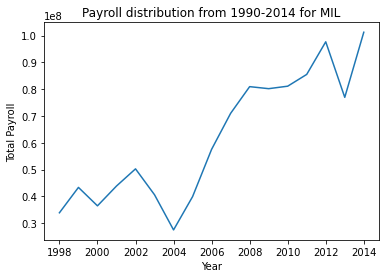

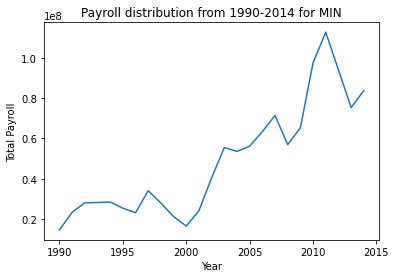

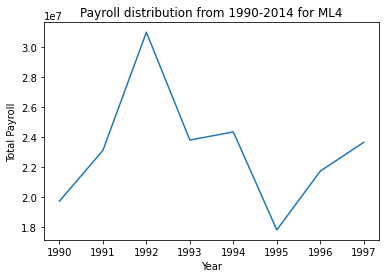

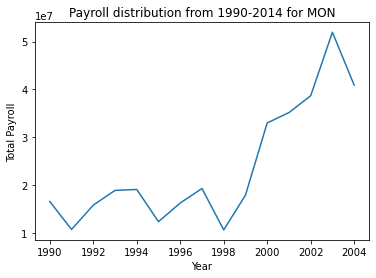

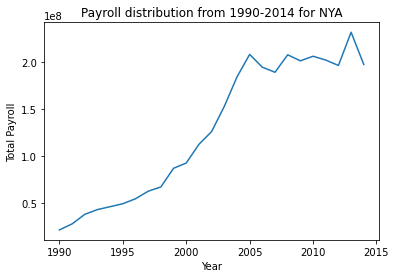

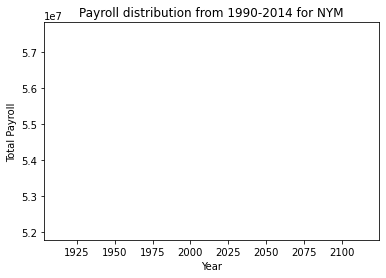

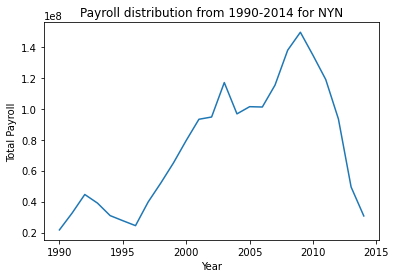

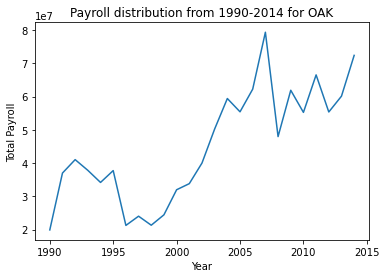

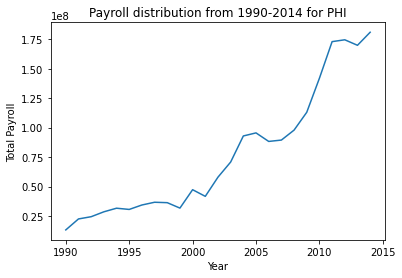

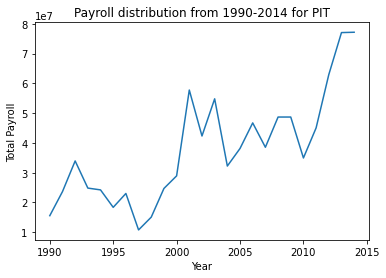

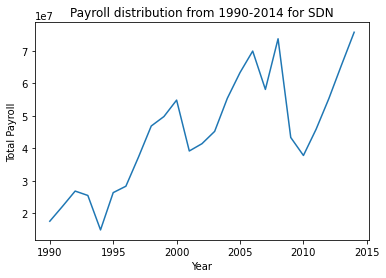

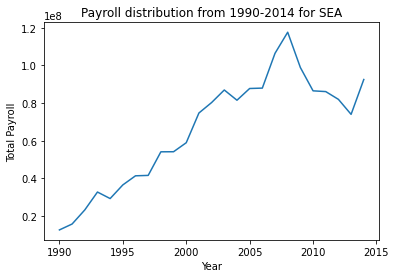

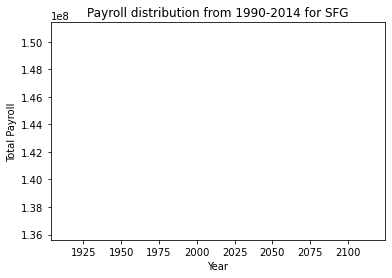

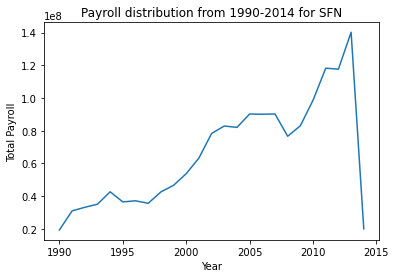

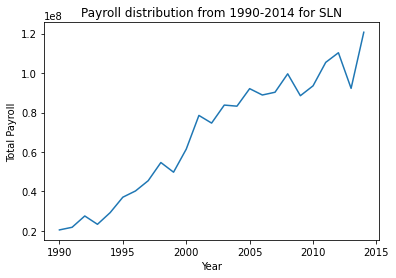

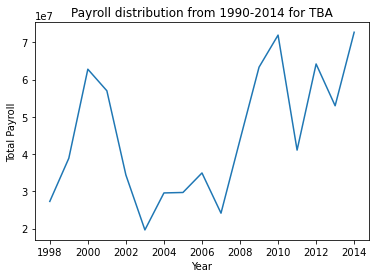

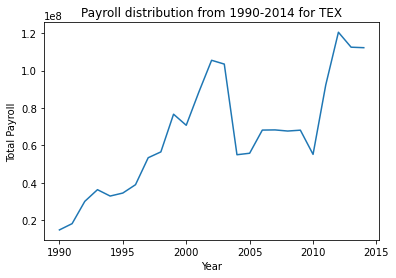

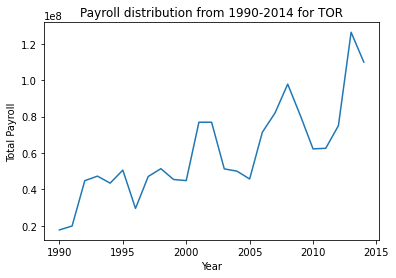

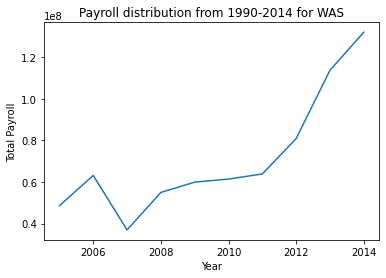

In [48]:
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)
cursor = conn.cursor()

total_table = pandas.read_sql("SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries WHERE yearID > 1989 GROUP BY yearID, teamID", conn)
print(total_table.head(len(total_table)))


# Get a list of all the teams 
payroll_dict = {}
teams = np.unique(total_table.iloc[:,1].values)
for team in teams:
    payroll_dict[team] = []
for x in range(0, len(total_table)):
    payroll_dict[total_table.iloc[x]["teamID"]].append((total_table.iloc[x]["yearID"], total_table.iloc[x]["total_payroll"]))

# Plot distribution using matplotlib
for key in payroll_dict:
    year = []
    pay = []
    for pair in payroll_dict[key]:
        year.append(pair[0])
        pay.append(pair[1])
    plt.plot(year, pay)
    plt.title("Payroll distribution from 1990-2014 for " + key)
    plt.xlabel("Year")
    plt.ylabel("Total Payroll")
    plt.show()


Question 1:
It is very clear, after analyzing and observing the distributions for each individual team, that the average total payroll for each team has increased dramatically within the period of 1990 - 2014. This also means that most graphs have a large range, as they start from a lower total payroll in 1990 and end much higher in 2014. As a result, I will analyze the averages of the payroll distributions over the 1990-2014, and I expect it to be a generally upward-trending graph. 
In order to create the graphs for each team, I first made a list of all the unique team names. This helps me create the dictionaries that will eventually sort out all the year and total_payroll tuples. Finally, to make the graph, I make a new year and pay list so that I can split the tuples into their individual list, and then graph them against each other. 

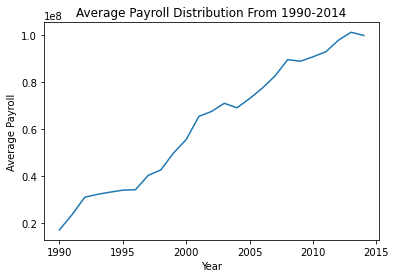

In [3]:
# Problem 3
# Since we're trying to show that the payrolls have generally increased over time, we will find the averages of every year and plot them on a graph from 1990-2014.

# Create a new list that is the averages of every year's payrolls
years = range(1990, 2015)
means = {}
for x in years:
    means[x] = (0, 0)
for x in range(0, len(total_table)):
    temp = list(means[total_table.iloc[x]["yearID"]])
    temp[0] += total_table.iloc[x]["total_payroll"]
    temp[1] += 1
    means[total_table.iloc[x]["yearID"]] = tuple(temp)

# Now create the correct list from the means dictionary
mean = []
for key in means:
    sum = means[key][0]
    n = means[key][1]
    x = sum / n
    mean.append(x)
    
plt.plot(years, mean)
plt.title("Average Payroll Distribution From 1990-2014")
plt.xlabel("Year")
plt.ylabel("Average Payroll")
plt.show()


     yearID teamID  total_payroll          bins   W    G  win_percent
0      1990    ATL     14555501.0  (1989, 1995]  65  162    40.123457
1      1990    BAL      9680084.0  (1989, 1995]  76  161    47.204969
2      1990    BOS     20558333.0  (1989, 1995]  88  162    54.320988
3      1990    CAL     21720000.0  (1989, 1995]  80  162    49.382716
4      1990    CHA      9491500.0  (1989, 1995]  94  162    58.024691
..      ...    ...            ...           ...  ..  ...          ...
723    2014    SLN    120693000.0  (2010, 2014]  90  162    55.555556
724    2014    TBA     72689100.0  (2010, 2014]  77  162    47.530864
725    2014    TEX    112255059.0  (2010, 2014]  67  162    41.358025
726    2014    TOR    109920100.0  (2010, 2014]  83  162    51.234568
727    2014    WAS    131983680.0  (2010, 2014]  96  162    59.259259

[728 rows x 7 columns]


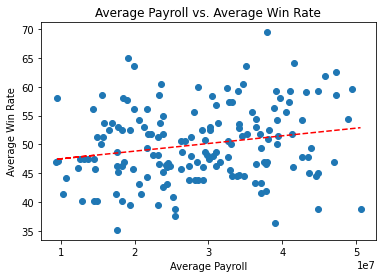

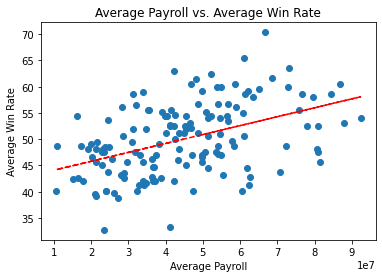

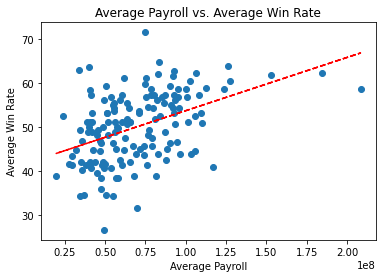

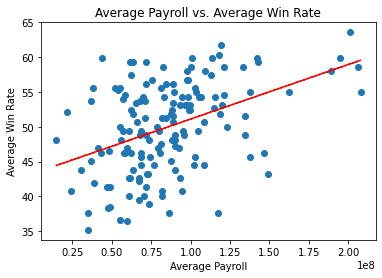

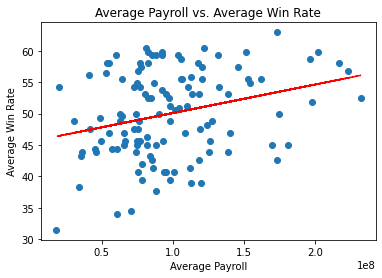

In [4]:
# Problem 4
total_table["bins"] = pandas.cut(x=total_table["yearID"], bins = [1989, 1995, 2000, 2005, 2010, 2014])

total_relations = total_table.merge(team_win_percent_14, how = "inner", left_on = ["yearID","teamID"], right_on = ["yearID", "teamID"])

print(total_relations.head(len(total_relations)))

# Same approach as above, except keys are bins now and they correspond to a (avg payroll, avg win_percent) tuple
bin_dict = {}
bins = np.unique(total_table.iloc[:,3].values)
for x in bins: 
    bin_dict[x] = []
    
for x in range(0, len(total_relations)):
    bin_dict[total_relations.iloc[x]["bins"]].append((total_relations.iloc[x]["total_payroll"], total_relations.iloc[x]["win_percent"]))

for key in bin_dict:
    x = []
    y = []
    for pair in bin_dict[key]:
        x.append(pair[0])
        y.append(pair[1])

    plt.scatter(x,y)
    plt.title("Average Payroll vs. Average Win Rate")
    plt.xlabel("Average Payroll")
    plt.ylabel("Average Win Rate")
    
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    
    plt.show()


Question 2: 
After observing the 5 different graphs, all the data and trend lines seem to agree that having a higher budget and paying more for your players and team will, statistically, increase your win rate. There is a lot of variation in this data though, since the points are scattered very widely around the trend line, as opposed to being centered very tightly around it; as a result, the correlation should be much lower. 
In order to create these graphs, I first have to use pandas.cut to split the graph into 5 easily identifiable time "periods." From there, I then unique dictionary entries for each bin, filling them up with tuples containing a total_payroll and win rate pair, so I can do a similar process to the problem above by splitting the tuples up and graphing them against eachother. Finally, I use polyfit to add a trend line to each scatter plot.

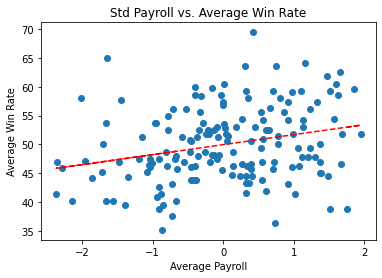

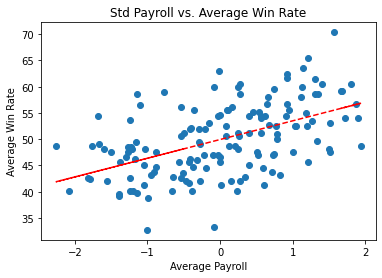

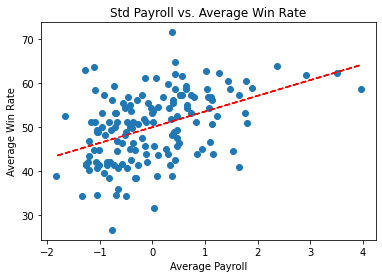

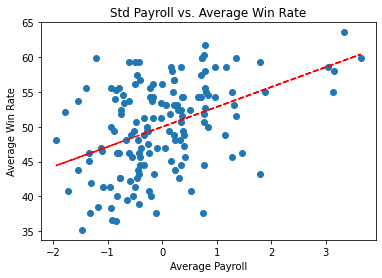

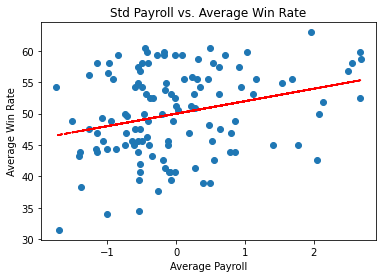

In [5]:
# Problem 5
# First, get the mean payroll for each bin with the mean list we created earlier

std_payroll = (total_relations.groupby(["yearID"]))["total_payroll"].std()
std_payroll_df = std_payroll.to_frame()

std_add_list = []

# Loop through std_payroll_df to get a usable list of std
std = []
for x in range(0, len(std_payroll_df)):
    std.append(std_payroll_df.iloc[x]["total_payroll"])

counter = 0
current_year = 1990
for x in range(0, len(total_relations)):
    std_add_list.append(((total_relations.iloc[x]["total_payroll"]) - mean[counter]) / std[counter])
    if current_year != total_relations.iloc[x]["yearID"]:
        current_year = total_relations.iloc[x]["yearID"]
        counter += 1
    
total_relations["std_payroll"] = std_add_list
total_relations

# Create a new dictionary, similar to bin_dict above, but with the std_payroll entries
new_bin_dict = {}

for x in bins: 
    new_bin_dict[x] = []
    
for x in range(0, len(total_relations)):
    new_bin_dict[total_relations.iloc[x]["bins"]].append((total_relations.iloc[x]["std_payroll"], total_relations.iloc[x]["win_percent"]))

# Now repeat same process for plotting from problem above 
for key in new_bin_dict:
    x = []
    y = []
    for pair in new_bin_dict[key]:
        x.append(pair[0])
        y.append(pair[1])

    plt.scatter(x,y)
    plt.title("Std Payroll vs. Average Win Rate")
    plt.xlabel("Std Payroll (in billions)")
    plt.ylabel("Average Win Rate (percent)")
    
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    
    plt.show()

Question 3:
In terms of transformation, the biggest difference now comes in the form of the x axis; before it went up to the millions, but now that it has been "standardized" with a formula, it's much lower, ranging from -3 to 3, because the payroll is actually lower than the average payroll. The lower scale on the x axis also helps us to identify the standard deviation more easily, which in turn allows us to see the spread of the data much more clearly.
In order to transform these graphs with the standardized formula, I first had to get the means and standard deviations of every year into their own lists. Coupled with a moving counter, I could just loop through the total_relations data frame and create the list std_add_list easily by plugging in the formula for every value in the dataframe. Finally, I plotted the new lists against eachother for the new plots. 

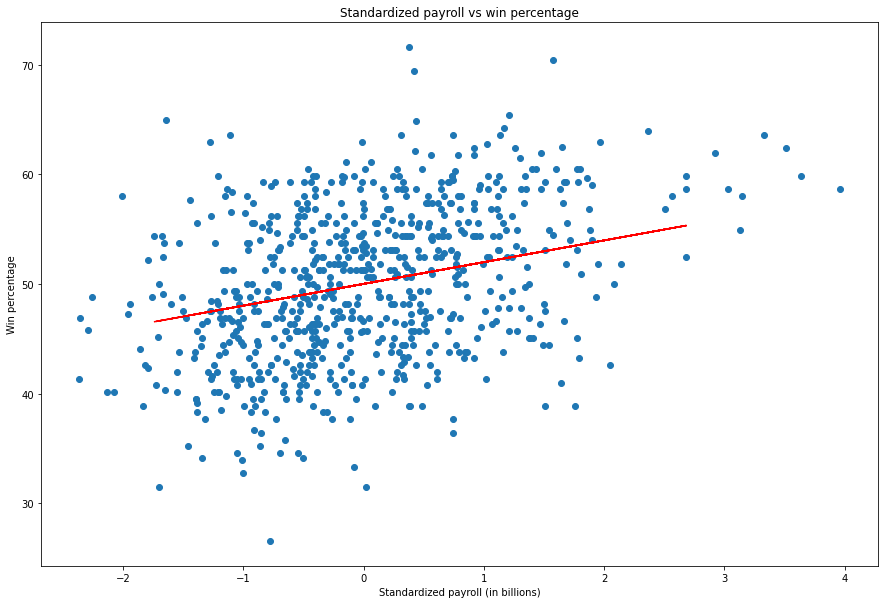

In [21]:
# Problem 7

plt.figure(figsize=(15,10))
plt.plot(total_relations["std_payroll"].values, total_relations["win_percent"].values, "o")
plt.title("Standardized payroll vs win percentage")
plt.xlabel("Standardized payroll (in billions)")
plt.ylabel("Win percentage")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

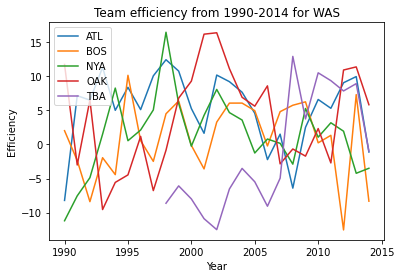

In [60]:
# Problem 8
expected_win_pct = []
efficiency = []

# Similar process as adding std_add_list to the table
expected = total_relations["std_payroll"].values
for x in expected:
    expected_win_pct.append(50 + 2.5 * x)
total_relations["expected_win_pct"] = expected_win_pct

for x in range(0, len(expected_win_pct)):
    efficiency.append(total_relations["win_percent"][x] - expected_win_pct[x])
    
total_relations["efficiency"] = efficiency

efficiency_dict = {}
for team in teams:
    efficiency_dict[team] = []
for x in range(0, len(total_relations)):
    efficiency_dict[total_relations.iloc[x]["teamID"]].append((total_relations.iloc[x]["yearID"], total_relations.iloc[x]["efficiency"]))
    
plt.title("Team efficiency from 1990-2014 for " + key)
plt.xlabel("Year")
plt.ylabel("Efficiency")


for key in efficiency_dict:
    if key == "OAK" or key == "BOS" or key == "NYA" or key == "ATL" or key == "TBA":
        years = []
        eff = []
        for pair in efficiency_dict[key]:
            years.append(pair[0])
            eff.append(pair[1])
        plt.plot(years, eff, label = key)
        plt.legend(loc= "upper left")
plt.show()

In this effiency graph, we can see that Oakland actually had a pretty bad spending efficiency for any time period other than the Moneyball (2002) time period. For a majority of Oakland's time, it hovers around and even goes below 0, except for at the very inception of the team, and much more recently, after 2010. This shows that the graphs we made for the earlier questions might have been a little misleading, because those showed a simple linear relationship between spending and winning. However, with the way we define "spending efficiency" with our data here, it is being compared to the average spread of that particular year's payroll. As a result, what the efficiency is REALLY saying is how much it deviates from the expected win rate based on how much you paid, which is not really the same as an average for this case. 